# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [4]:
data[data["TotalSpent"] == '0'].shape

(0, 20)

In [6]:
data[~data["TotalSpent"].apply(lambda x: x.replace('.', '').isdigit())]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [7]:
data.TotalSpent.iloc[data[~data["TotalSpent"].apply(lambda x: x.replace('.', '').isdigit())].index] = '0'

C:\Users\София\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
data[data["TotalSpent"] == '0'].shape

(9, 20)

In [9]:
data.TotalSpent = data.TotalSpent.astype('float64')

In [10]:
data.TotalSpent.iloc[data[data["TotalSpent"] == 0].index] = data.TotalSpent.median()

In [11]:
data[data["TotalSpent"] == 0].shape

(0, 20)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [158]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [159]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# YOUR CODE

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### 1

In [64]:
# YOUR CODE
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 123.9 KB


array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

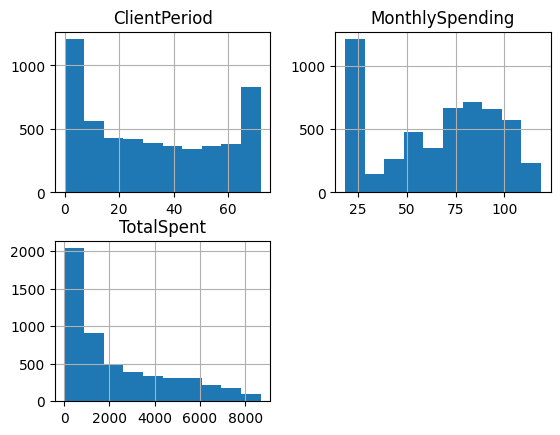

In [63]:
data[num_cols].hist()

In [74]:
for column in cat_cols:
  print(f'---------{column}---------\n{data[column].value_counts()}')

---------Sex---------
Male      2655
Female    2627
Name: Sex, dtype: int64
---------IsSeniorCitizen---------
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
---------HasPartner---------
No     2705
Yes    2577
Name: HasPartner, dtype: int64
---------HasChild---------
No     3676
Yes    1606
Name: HasChild, dtype: int64
---------HasPhoneService---------
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
---------HasMultiplePhoneNumbers---------
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
---------HasInternetService---------
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
---------HasOnlineSecurityService---------
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
---------HasOnlineBackup---------
No                     2332
Yes                    1809
No internet servi

### 2

<Axes: >

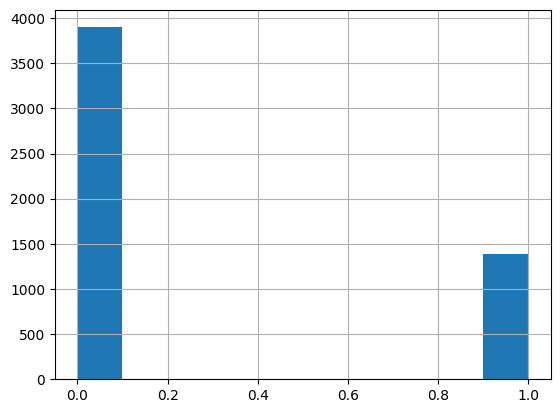

In [76]:
data[target_col].hist() # есть дисбаланс

In [77]:
data[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [160]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
# YOUR CODE

In [161]:
 scaler = StandardScaler()
 scaler.fit(data[num_cols])
 data[num_cols] = scaler.transform(data[num_cols])

In [162]:
data[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,0.920767,-1.505447,-0.557319
1,1.613288,-1.294998,-0.184231
2,-1.279005,0.363737,-0.976544
3,-0.016173,0.476418,0.123555
4,1.124450,1.667856,1.970999
...,...,...,...
5277,-1.197532,-1.144204,-0.973787
5278,0.717084,-0.678565,-0.044739
5279,-1.279005,-0.327265,-0.985741
5280,-0.138382,0.367051,-0.032918


In [89]:
le = LabelEncoder()
for column in cat_cols:
  le.fit(data[column])
  data[column] = le.transform(data[column])

In [97]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0.920767,-1.505447,-0.557319,1,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3,0
1,1.613288,-1.294998,-0.184231,1,0,1,0,1,2,2,1,1,1,1,1,1,2,0,1,0
2,-1.279005,0.363737,-0.976544,1,0,0,0,1,0,1,0,0,0,2,0,0,0,1,2,1
3,-0.016173,0.476418,0.123555,0,1,1,0,1,2,1,0,0,2,0,0,0,0,0,3,0
4,1.124450,1.667856,1.970999,0,0,1,1,1,2,1,2,2,2,2,2,2,2,0,1,0


In [ ]:
# без подбора

### X_test

In [103]:
sub = pd.read_csv('./submission.csv')

In [105]:
sub.shape

(1761, 2)

In [171]:
X_test = pd.read_csv('./test.csv')

In [172]:
X_test.shape

(1761, 19)

In [173]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [174]:
X_test[X_test["TotalSpent"] == '0'].shape

(0, 19)

In [175]:
X_test[~X_test["TotalSpent"].apply(lambda x: x.replace('.', '').isdigit())]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [176]:
X_test.TotalSpent.iloc[X_test[~X_test["TotalSpent"].apply(lambda x: x.replace('.', '').isdigit())].index] = '0'

<ipython-input-176-a57201f1647b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.TotalSpent.iloc[X_test[~X_test["TotalSpent"].apply(lambda x: x.replace('.', '').isdigit())].index] = '0'


In [177]:
X_test[X_test["TotalSpent"] == '0'].shape

(2, 19)

In [178]:
X_test.TotalSpent = X_test.TotalSpent.astype('float64')

In [179]:
X_test.TotalSpent.iloc[X_test[X_test["TotalSpent"] == 0].index] = X_test.TotalSpent.median()

<ipython-input-179-cb87a22d11bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.TotalSpent.iloc[X_test[X_test["TotalSpent"] == 0].index] = X_test.TotalSpent.median()


In [180]:
X_test[X_test["TotalSpent"] == 0].shape

(0, 19)

In [181]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [182]:
scaler = StandardScaler()
scaler.fit(X_test[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



In [ ]:
le = LabelEncoder()
for column in cat_cols:
  le.fit(X_test[column])
  X_test[column] = le.transform(X_test[column])

In [183]:
X_test

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,0.394782,-0.274027,0.057034,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,-0.133958,1.147644,0.330322,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,-0.947404,0.401602,-0.696469,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,1.411590,0.326160,1.155656,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,1.574279,-1.481107,-0.384465,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,1.574279,1.370619,2.345057,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,-0.784715,-1.455959,-0.879090,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,-1.232110,0.911258,-0.923760,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,-0.540681,0.832463,-0.282109,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


### без подбора

In [ ]:
data[feature_cols]

In [140]:
# заново создадим модель, указав солвер
clf = LogisticRegression()

# запустим поиск
clf.fit(data[feature_cols], data[target_col])

LogisticRegression()

In [127]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [142]:
y_pred = clf.predict_proba(X_test)[:, 1]
y_pred

array([0.04597982, 0.70630685, 0.67795865, ..., 0.7558495 , 0.61730284,
       0.0107572 ])

### с подбором

In [138]:
# заново создадим модель, указав солвер
clf = LogisticRegression(solver='saga')

# опишем сетку, по которой будем искать
param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001], # также можно указать обычный массив, [1, 2, 3, 4]
    'penalty': ['l1', 'l2'],
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')

# запустим поиск
search.fit(data[feature_cols], data[target_col])

# выведем наилучшие параметры
print(search.best_params_)

{'C': 1, 'penalty': 'l1'}


In [141]:
search.best_estimator_.predict_proba(X_test)

array([[0.95406607, 0.04593393],
       [0.29512874, 0.70487126],
       [0.32300067, 0.67699933],
       ...,
       [0.24549655, 0.75450345],
       [0.38584897, 0.61415103],
       [0.98910899, 0.01089101]])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.5

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [145]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.2 MB/s eta 0:00:00


In [146]:
from catboost import CatBoostClassifier

In [ ]:
CatBoostClassifier

In [163]:
data[feature_cols]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,0.920767,-1.505447,-0.557319,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,1.613288,-1.294998,-0.184231,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,-1.279005,0.363737,-0.976544,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,-0.016173,0.476418,0.123555,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,1.124450,1.667856,1.970999,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.973787,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,0.717084,-0.678565,-0.044739,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,-1.279005,-0.327265,-0.985741,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,-0.138382,0.367051,-0.032918,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


### дисбаланс классов

In [195]:
data[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

In [196]:
data.shape

(5282, 20)

In [197]:
data_1 = data[data[target_col] == 1]
data_1.shape

(1384, 20)

In [199]:
data = pd.concat([data, data_1])
data.shape

(8050, 20)

In [200]:
data[target_col].value_counts()

1    4152
0    3898
Name: Churn, dtype: int64

In [205]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1772,-1.034586,1.097822,-0.695532,Male,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1
4285,0.554138,0.499617,0.652719,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
3501,-0.260592,-1.512075,-0.787629,Male,1,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
2900,0.065300,0.168202,0.055673,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
1041,-1.238268,0.093633,-0.958570,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [204]:
data = data.sample(frac=1)

In [249]:
catboost_model = CatBoostClassifier(iterations=1000,
                                    depth=12,
                                    learning_rate=0.5,)
catboost_model.fit(data[feature_cols],
                   data[target_col],
                   cat_features=cat_cols,
                   verbose=True
                   )

0:	learn: 0.5081713	total: 114ms	remaining: 1m 53s
1:	learn: 0.4193132	total: 260ms	remaining: 2m 9s
2:	learn: 0.3909127	total: 395ms	remaining: 2m 11s
3:	learn: 0.3872328	total: 411ms	remaining: 1m 42s
4:	learn: 0.3848564	total: 424ms	remaining: 1m 24s
5:	learn: 0.3193468	total: 582ms	remaining: 1m 36s
6:	learn: 0.2975904	total: 765ms	remaining: 1m 48s
7:	learn: 0.2840497	total: 1.04s	remaining: 2m 8s
8:	learn: 0.2839299	total: 1.06s	remaining: 1m 56s
9:	learn: 0.2794092	total: 1.36s	remaining: 2m 14s
10:	learn: 0.2673733	total: 1.61s	remaining: 2m 24s
11:	learn: 0.2562097	total: 1.88s	remaining: 2m 34s
12:	learn: 0.2557949	total: 1.89s	remaining: 2m 23s
13:	learn: 0.2487787	total: 2.09s	remaining: 2m 27s
14:	learn: 0.2455860	total: 2.25s	remaining: 2m 28s
15:	learn: 0.2386165	total: 2.4s	remaining: 2m 27s
16:	learn: 0.2370469	total: 2.55s	remaining: 2m 27s
17:	learn: 0.2258677	total: 2.7s	remaining: 2m 27s
18:	learn: 0.2008503	total: 2.84s	remaining: 2m 26s
19:	learn: 0.1926304	total

In [250]:
y_pred = catboost_model.predict_proba(X_test)[:, 1]
y_pred

array([1.31910238e-04, 9.99762222e-01, 1.05574450e-02, ...,
       9.99966386e-01, 3.44227528e-01, 1.24668035e-05])

In [251]:
y_pred[:100]

array([1.31910238e-04, 9.99762222e-01, 1.05574450e-02, 4.20488298e-06,
       3.97128701e-05, 3.54863121e-01, 5.79210790e-01, 1.36360211e-01,
       1.82565590e-02, 4.74740461e-01, 5.84423392e-03, 2.94019076e-01,
       9.02857305e-02, 3.13209265e-02, 9.37224831e-07, 5.64016491e-05,
       2.69462840e-02, 2.72817484e-01, 3.16424744e-05, 2.84648239e-04,
       3.66649033e-02, 1.20108626e-04, 9.97778568e-01, 4.03880025e-02,
       2.17551540e-03, 2.84897137e-01, 1.55100256e-03, 5.93119297e-05,
       1.04273312e-04, 4.68450388e-05, 2.48987528e-01, 9.30803931e-01,
       9.99473686e-01, 7.11682879e-01, 1.95628703e-04, 1.39193320e-04,
       9.92640901e-01, 1.79444449e-03, 2.46436829e-04, 1.29809859e-05,
       6.80165086e-02, 9.90470776e-01, 8.13517751e-01, 2.69602277e-01,
       9.19757341e-01, 6.16036538e-02, 5.63564990e-02, 2.34913847e-02,
       1.68695395e-01, 6.21731376e-02, 4.76567657e-01, 9.59577598e-01,
       4.67110410e-02, 8.98595799e-02, 7.69385593e-03, 1.24807910e-05,
      

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

In [ ]:
0.82259

iterations=1000,
depth=10,
learning_rate=0.1

# Предсказания

In [236]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

SyntaxError: invalid syntax (<ipython-input-236-5d81a83fcf2f>, line 4)

Лучшее решение отправьте в Stepik.

In [252]:
submission = pd.read_csv('./submission.csv')
submission

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1756,1756,0.5
1757,1757,0.5
1758,1758,0.5
1759,1759,0.5


In [253]:
submission['Churn'] = y_pred
submission

,Id,Churn
0,0,0.000132
1,1,0.999762
2,2,0.010557
3,3,0.000004
4,4,0.000040
...,...,...
1756,1756,0.101587
1757,1757,0.000309
1758,1758,0.999966
1759,1759,0.344228


In [254]:
submission.to_csv('./my_submission.csv', index=False)

In [255]:
my_submission = pd.read_csv('./my_submission.csv')
my_submission


,Id,Churn
0,0,0.000132
1,1,0.999762
2,2,0.010557
3,3,0.000004
4,4,0.000040
...,...,...
1756,1756,0.101587
1757,1757,0.000309
1758,1758,0.999966
1759,1759,0.344228
